In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from datetime import datetime
import numpy as np
import covidutil as cu

In [2]:
folder = "c:/PY-ML/data/covid1406/"
file = folder + "districts.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df['Death Ratio'] = df['Deceased']/df['Confirmed'] *100

In [5]:
df['Active'] = df['Confirmed'] - (df['Deceased'] + df['Recovered'])

# Districts

In [6]:
State = 'Maharashtra'
District = 'Mumbai'

In [7]:
df1 = df[df['State'] == State]
df2 = df1[df1['District'] == District][-415:].reset_index(drop = True)

In [8]:
df2

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Death Ratio,Active
0,2020-04-27,Maharashtra,Mumbai,5776,711,219,0,NaN,3.791551,4846
1,2020-04-28,Maharashtra,Mumbai,6169,798,244,0,NaN,3.955260,5127
2,2020-04-29,Maharashtra,Mumbai,6644,936,270,0,NaN,4.063817,5438
3,2020-04-30,Maharashtra,Mumbai,7061,1092,290,0,NaN,4.107067,5679
4,2020-05-01,Maharashtra,Mumbai,7812,1134,296,0,NaN,3.789042,6382
...,...,...,...,...,...,...,...,...,...,...
410,2021-06-11,Maharashtra,Mumbai,714216,679009,15079,2197,2789713.0,2.111266,20128
411,2021-06-12,Maharashtra,Mumbai,714965,679602,15097,2201,2789713.0,2.111572,20266
412,2021-06-13,Maharashtra,Mumbai,715660,680082,15183,2229,2789713.0,2.121538,20395
413,2021-06-14,Maharashtra,Mumbai,716190,680546,15202,2237,2789713.0,2.122621,20442


In [9]:
plot1 = df2['Confirmed']
plot2 = df2['Deceased']
plot3 = df2['Recovered']

Text(0, 0.5, 'Recovered')

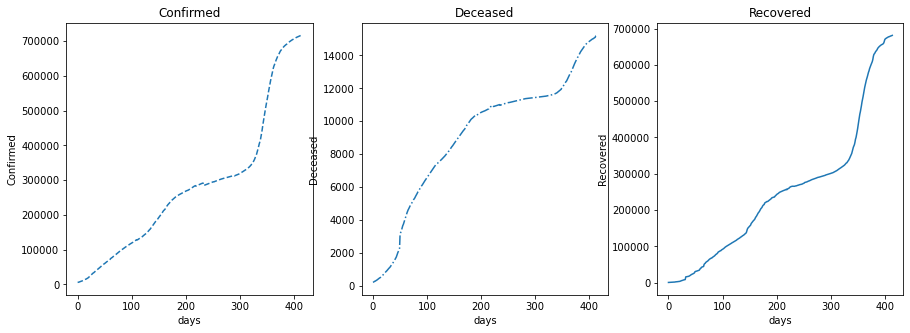

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))

ax1.ticklabel_format(style='plain')
ax1.plot(plot1,ls = '--')
ax1.set_title('Confirmed')
ax1.set_xlabel('days')
ax1.set_ylabel('Confirmed')


ax2.plot(plot2,ls = '-.')
ax2.set_title('Deceased')
ax2.set_xlabel('days')
ax2.set_ylabel('Deceased')

ax3.ticklabel_format(style='plain')
ax3.plot(plot3,ls = '-')
ax3.set_title('Recovered')
ax3.set_xlabel('days')
ax3.set_ylabel('Recovered')

### TOP10

In [11]:
state10 = 'Karnataka'
Date10 = '2021-05-15'

In [12]:
df3 = df[df['State']== state10]
top10 = df3[df3['Date']== Date10].sort_values(by = 'Confirmed', ascending = False)[:10].reset_index(drop = True)

In [13]:
#top10 = df1[df1['Date'] == Date10].sort_values(by = 'Confirmed', ascending = False)[:10].reset_index(drop = True)

In [14]:
top10

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Death Ratio,Active
0,2021-05-15,Karnataka,Bengaluru Urban,1042714,666582,9340,1,6883888.0,0.895739,366792
1,2021-05-15,Karnataka,Mysuru,110316,94053,1397,0,107338.0,1.266362,14866
2,2021-05-15,Karnataka,Tumakuru,79341,51786,678,0,106564.0,0.854539,26877
3,2021-05-15,Karnataka,Ballari,72677,54112,1047,0,402407.0,1.440621,17518
4,2021-05-15,Karnataka,Dakshina Kannada,63357,49355,806,2,131281.0,1.272156,13196
5,2021-05-15,Karnataka,Hassan,62199,46014,693,1,10800.0,1.114166,15492
6,2021-05-15,Karnataka,Kalaburagi,55348,39714,633,0,409596.0,1.143673,15001
7,2021-05-15,Karnataka,Mandya,50073,41362,334,0,14874.0,0.667026,8377
8,2021-05-15,Karnataka,Udupi,45985,38466,260,0,86092.0,0.565402,7259
9,2021-05-15,Karnataka,Belagavi,45059,34206,389,0,396565.0,0.863313,10464


In [15]:
list_top10 = list(top10['District'])


In [16]:
list_top10


['Bengaluru Urban',
 'Mysuru',
 'Tumakuru',
 'Ballari',
 'Dakshina Kannada',
 'Hassan',
 'Kalaburagi',
 'Mandya',
 'Udupi',
 'Belagavi']

In [17]:
top10data = []
for i in list_top10:
    i = df[df['District'] == i].reset_index(drop = True)
    top10data.append(i)

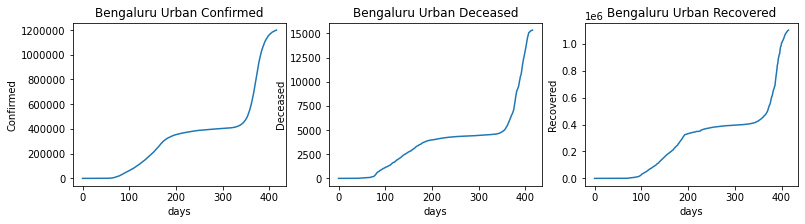

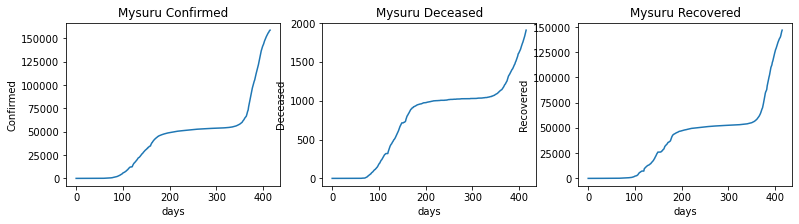

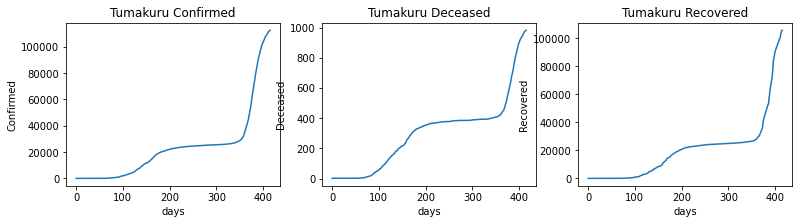

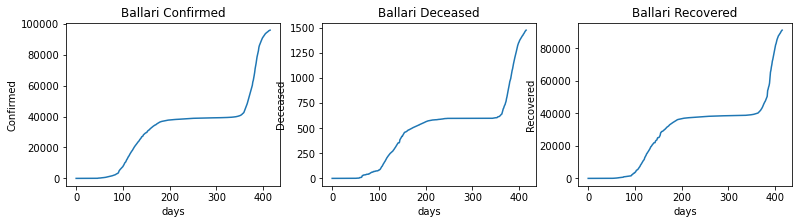

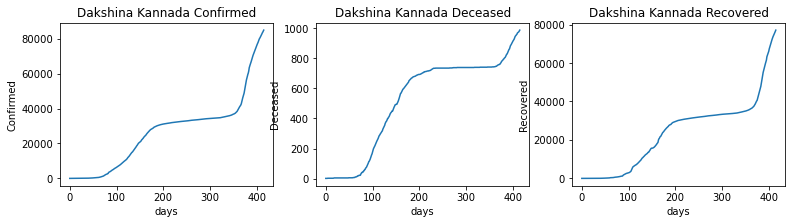

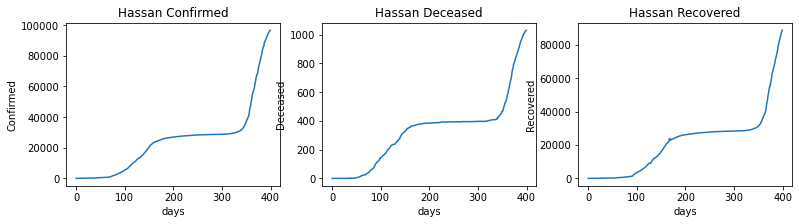

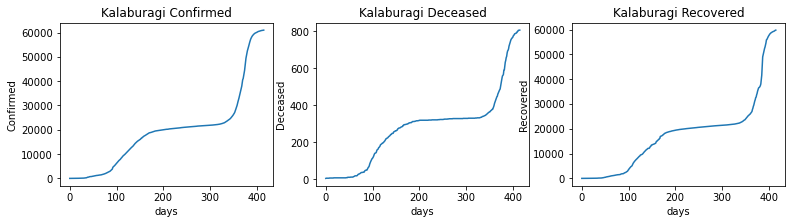

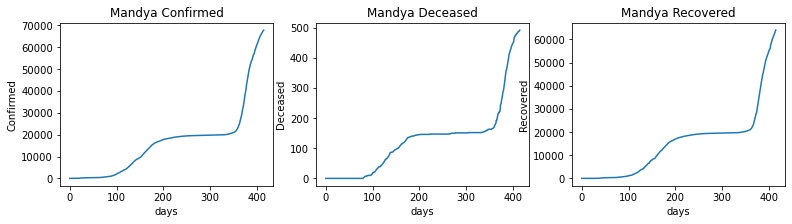

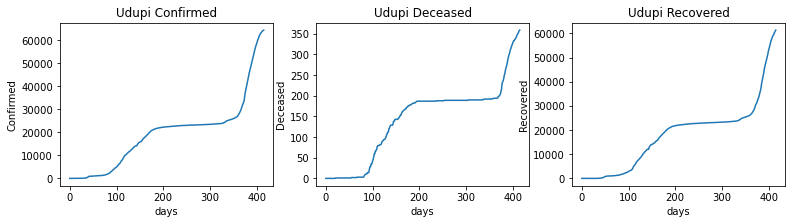

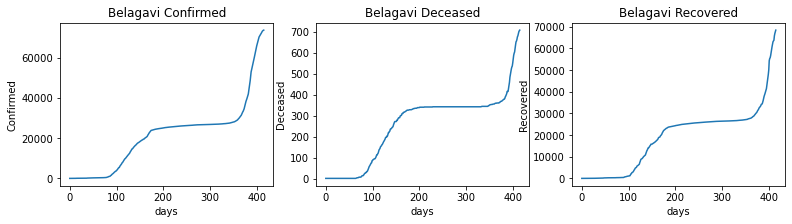

In [18]:
for i in range(10):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (13,3),sharex = True)
    ax1.ticklabel_format(style = 'plain')
    ax1.plot(top10data[i]['Confirmed'])
    ax1.set_title(list_top10[i] +' Confirmed')
    ax1.set_xlabel('days')
    ax1.set_ylabel('Confirmed')
          
    ax2.plot(top10data[i]['Deceased'])
    ax2.set_title(list_top10[i] + ' Deceased')
    ax2.set_xlabel('days')
    ax2.set_ylabel('Deceased')

    ax3.plot(top10data[i]['Recovered'])
    ax3.set_title(list_top10[i] + ' Recovered')
    ax3.set_xlabel('days')
    ax3.set_ylabel('Recovered')


### Districts

In [19]:
a = df[df['District'] == 'Delhi'].reset_index(drop = True)

In [20]:
a

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Death Ratio,Active
0,2020-04-26,Delhi,Delhi,2918,877,54,0,37613.0,1.850583,1987
1,2020-04-27,Delhi,Delhi,3108,877,54,0,39911.0,1.737452,2177
2,2020-04-28,Delhi,Delhi,3314,1078,54,0,43370.0,1.629451,2182
3,2020-04-29,Delhi,Delhi,3439,1092,56,0,47225.0,1.628380,2291
4,2020-04-30,Delhi,Delhi,3515,1094,59,0,47225.0,1.678521,2362
...,...,...,...,...,...,...,...,...,...,...
411,2021-06-11,Delhi,Delhi,1430671,1401977,24772,0,20119290.0,1.731495,3922
412,2021-06-12,Delhi,Delhi,1430884,1402474,24800,0,20190803.0,1.733194,3610
413,2021-06-13,Delhi,Delhi,1431139,1402850,24823,0,20263554.0,1.734493,3466
414,2021-06-14,Delhi,Delhi,1431270,1403205,24839,0,20323110.0,1.735452,3226


In [21]:
a = a.drop(columns = ['State','District','Other'])

In [22]:
a = a.rename(columns = {'Confirmed':'Delhi Confirmed',
                   'Recovered': 'Delhi Recovered',
                   'Deceased':'Delhi Deceased',
                   'Tested': 'Delhi Tested'})

In [23]:
a

,Date,Delhi Confirmed,Delhi Recovered,Delhi Deceased,Delhi Tested,Death Ratio,Active
0,2020-04-26,2918,877,54,37613.0,1.850583,1987
1,2020-04-27,3108,877,54,39911.0,1.737452,2177
2,2020-04-28,3314,1078,54,43370.0,1.629451,2182
3,2020-04-29,3439,1092,56,47225.0,1.628380,2291
4,2020-04-30,3515,1094,59,47225.0,1.678521,2362
...,...,...,...,...,...,...,...
411,2021-06-11,1430671,1401977,24772,20119290.0,1.731495,3922
412,2021-06-12,1430884,1402474,24800,20190803.0,1.733194,3610
413,2021-06-13,1431139,1402850,24823,20263554.0,1.734493,3466
414,2021-06-14,1431270,1403205,24839,20323110.0,1.735452,3226


In [24]:
b = df[df['District'] == 'Pune'].reset_index(drop = True)

In [25]:
b = b.drop(columns = ['State','District','Other'])

In [26]:
b = b.rename(columns = {'Confirmed':'Mumbai Confirmed',
                   'Recovered': 'Mumbai Recovered',
                   'Deceased':'Mumbai Deceased',
                   'Tested': 'Mumbai Tested'})

In [27]:
b

,Date,Mumbai Confirmed,Mumbai Recovered,Mumbai Deceased,Mumbai Tested,Death Ratio,Active
0,2020-04-26,1052,210,76,NaN,7.224335,766
1,2020-04-27,1099,221,80,NaN,7.279345,798
2,2020-04-28,1174,233,82,NaN,6.984668,859
3,2020-04-29,1192,244,85,NaN,7.130872,863
4,2020-04-30,1248,248,88,NaN,7.051282,912
...,...,...,...,...,...,...,...
411,2021-06-11,1033063,998161,14502,97127.0,1.403787,20400
412,2021-06-12,1034502,1001206,14803,97127.0,1.430930,18493
413,2021-06-13,1035743,1001826,15187,97127.0,1.466290,18730
414,2021-06-14,1036615,1001925,15464,97127.0,1.491779,19226


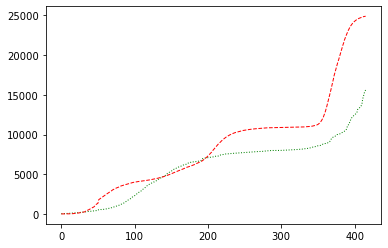

In [28]:
fig, ax = plt.subplots(1,1)
ax.ticklabel_format(style='plain')
ax.plot(b['Mumbai Deceased'],c = 'g', linewidth = 1, linestyle = 'dotted')
ax.plot(a['Delhi Deceased'],c = 'r', linewidth = 1, linestyle = 'dashed')


##covid district data

In [67]:
df4 = df[['Date','District','State', 'Confirmed','Deceased','Recovered','Death Ratio','Active']].sort_values(by = 'Confirmed', ascending = False).reset_index(drop = True)

In [68]:
df4 = df4[df4['Date'] == '2021-06-15'].reset_index(drop = True)

In [69]:
df4  = df4.sort_values(by = 'Active', ascending = False)

In [70]:
df4[df4['State'].isin(['Maharashtra','Goa','Kerala','Karnataka','Tamil Nadu'])]

,Date,District,State,Confirmed,Deceased,Recovered,Death Ratio,Active
1,2021-06-15,Bengaluru Urban,Karnataka,1199143,15335,1100612,1.278830,83196
3,2021-06-15,Mumbai,Maharashtra,716351,15216,681376,2.124098,19759
2,2021-06-15,Pune,Maharashtra,1037780,15593,1004382,1.502534,17805
10,2021-06-15,Ernakulam,Kerala,336573,1132,319659,0.336331,15782
23,2021-06-15,Coimbatore,Tamil Nadu,206833,1778,189606,0.859631,15449
...,...,...,...,...,...,...,...,...
240,2021-06-15,Bidar,Karnataka,24073,388,23581,1.611764,104
641,2021-06-15,Other State,Maharashtra,146,118,0,80.821918,28
589,2021-06-15,Airport Quarantine,Tamil Nadu,2080,2,2075,0.096154,3
649,2021-06-15,Other State,Karnataka,36,3,33,8.333333,0


In [32]:
df4[df4['District'].isin(['Mumbai','Chennai','Gurugram','Noida','Delhi','Bengaluru Urban','Hyderabad'])].reset_index(drop = True)
                                                                     

,Date,District,State,Confirmed,Deceased,Death Ratio
0,2021-06-15,Delhi,Delhi,1431498,24851,1.736014
1,2021-06-15,Bengaluru Urban,Karnataka,1199143,15335,1.278830
2,2021-06-15,Mumbai,Maharashtra,716351,15216,2.124098
3,2021-06-15,Chennai,Tamil Nadu,526614,7876,1.495593
4,2021-06-15,Gurugram,Haryana,180541,873,0.483547


In [37]:
df4[:50]

,Date,District,State,Confirmed,Deceased,Death Ratio
0,2021-06-15,Delhi,Delhi,1431498,24851,1.736014
1,2021-06-15,Bengaluru Urban,Karnataka,1199143,15335,1.278830
2,2021-06-15,Pune,Maharashtra,1037780,15593,1.502534
3,2021-06-15,Mumbai,Maharashtra,716351,15216,2.124098
4,2021-06-15,Unknown,Telangana,606436,3510,0.578791
5,2021-06-15,Thane,Maharashtra,569277,9837,1.727981
6,2021-06-15,Chennai,Tamil Nadu,526614,7876,1.495593
7,2021-06-15,Nagpur,Maharashtra,491716,8148,1.657054
8,2021-06-15,Unknown,Assam,463175,3994,0.862309
9,2021-06-15,Nashik,Maharashtra,394664,6595,1.671042
